# Data preprocessing

Dataset link: https://grouplens.org/datasets/movielens/100k/

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
# !pip install tqdm

In [2]:
PATH = Path('ml-100k')

In [3]:
# Loading movie genres dataset

names = ['movieId', 'movie title', 'release_date', 'video_release_date',
         'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
         "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
        'Thriller', 'War', 'Western']

df_genres = pd.read_csv(PATH/'u.item', '\|', names=names, engine='python')

# dropping non-useful columns
cols = [2,3,4,5]
df_genres.drop(df_genres.columns[cols],axis=1,inplace=True)
df_genres.head()

,movieId,movie title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [4]:
# Loading Tweets sentiment score
df_tweets = pd.read_csv('movie_score.csv')
df_tweets.rename(columns={'Unnamed: 0':'movieId', 'title':'movie title'}, inplace=True)
del df_tweets['movieId']
df_tweets.head()

,movie title,tag,sentiment_score
0,Toy Story (1995),ToyStory,0.43382
1,GoldenEye (1995),GoldenEye,-0.17804
2,Four Rooms (1995),FourRooms,0.00000
3,Get Shorty (1995),GetShorty,0.65950
4,Copycat (1995),Copycat,0.17978


In [5]:
sentiment_score = df_tweets['sentiment_score'].values
df_genres['sentiment_score'] = sentiment_score
df_genres.head()

,movieId,movie title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sentiment_score
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.43382
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.17804
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.00000
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.65950
4,5,Copycat (1995),0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0.17978


In [6]:
# Creating vectors for movie genres

df_genres['feature_vec'] = ''
feature_vec_list = []
for i in range(len(df_genres)):
    temp_vector = [df_genres.iloc[i,j] for j in range(2, 21)]
    feature_vec_list.append(temp_vector)
df_genres['feature_vec'] = feature_vec_list

# Dropping the non-useful columns
cols = [i for i in range(2, 20)]
df_genres.drop(df_genres.columns[cols], axis=1, inplace=True)
df_genres.head()

,movieId,movie title,sentiment_score,feature_vec
0,1,Toy Story (1995),0.43382,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,GoldenEye (1995),-0.17804,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,Four Rooms (1995),0.00000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,Get Shorty (1995),0.65950,"[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,Copycat (1995),0.17978,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
# Loading ratings dataset

names = ['userId', 'movieId', 'rating', 'timestamp']
df_ratings = pd.read_csv(PATH/'u.data', '\t', names=names, engine='python')
df_ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
# Merging both ratings and movie genres datasets and saving them into the 'data'
# variable
data = df_ratings.merge(df_genres, on='movieId', how='left')
data

,userId,movieId,rating,timestamp,movie title,sentiment_score,feature_vec
0,196,242,3,881250949,Kolya (1996),0.248775,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,186,302,3,891717742,L.A. Confidential (1997),0.000000,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ..."
2,22,377,1,878887116,Heavyweights (1994),0.178120,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,244,51,2,880606923,Legends of the Fall (1994),0.000000,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
4,166,346,1,886397596,Jackie Brown (1997),0.238500,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)",-0.298740,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
99996,716,204,5,879795543,Back to the Future (1985),0.088950,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
99997,276,1090,1,874795795,Sliver (1993),0.244440,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
99998,13,225,2,882399156,101 Dalmatians (1996),-0.007540,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
# Separating dataset into train and validation datasets
# It was considered the 20% most recent data as the validation dataset
    
time_80 = np.quantile(data.timestamp.values, 0.8)
train = data[data['timestamp'] < time_80].copy()
val = data[data['timestamp'] >= time_80].copy()

In [10]:
train.head()

,userId,movieId,rating,timestamp,movie title,sentiment_score,feature_vec
0,196,242,3,881250949,Kolya (1996),0.248775,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,22,377,1,878887116,Heavyweights (1994),0.178120,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,244,51,2,880606923,Legends of the Fall (1994),0.000000,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
4,166,346,1,886397596,Jackie Brown (1997),0.238500,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
5,298,474,4,884182806,Dr. Strangelove or: How I Learned to Stop Worr...,-0.024140,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [11]:
val.head()

,userId,movieId,rating,timestamp,movie title,sentiment_score,feature_vec
1,186,302,3,891717742,L.A. Confidential (1997),0.00000,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ..."
7,253,465,5,891628467,"Jungle Book, The (1994)",0.45880,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
13,210,40,3,891035994,"To Wong Foo, Thanks for Everything! Julie Newm...",0.15928,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19,234,1184,2,892079237,"Endless Summer 2, The (1994)",0.00000,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
21,167,486,4,892738452,Sabrina (1954),0.00000,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


## Modeling

In [12]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# a = nn.Embedding(5, 3)
# a

In [13]:
# type(a)

In [14]:
# type(x[0])

In [15]:
# x = a(torch.LongTensor([0,1,2,3,4]))
# x

In [16]:
# Creating the Matrix factorization class

import torch
import torch.nn as nn
import torch.nn.functional as F

class MF(nn.Module):
    def __init__(self, num_users, num_items, num_columns, emb_size=100):
        super(MF, self).__init__()
        # setting a seed value to prevent randomness when creating the embedding vectors
        torch.manual_seed(0)
        self.user_emb = nn.Embedding(num_users+1, emb_size)
        self.item_emb = nn.Embedding(num_items+1, emb_size)
        
        self.user_emb.weight.data.uniform_(0, 0.05)
        self.user_emb.weight.data.uniform_(0, 0.05)
        
        # Num_colums- num of columns of the feature vectors
        self.columns = int(emb_size*2) + num_columns
        
        self.linear1 = torch.nn.Linear(self.columns, 1)
    
    def forward(self, u, v, feature_vec_list):
        u = self.user_emb(u)
        v = self.item_emb(v)
    
        user_tt = torch.Tensor(u)
        item_tt = torch.Tensor(v)
        feature_vec_tt = torch.Tensor(feature_vec_list)
        
        # Concatenating user vector, movies vector and feature vectors
        x = torch.cat((user_tt, item_tt), -1)
        temp = torch.cat((x, feature_vec_tt), -1)
        
    
        output_score = F.relu(self.linear1(temp))
        
        return output_score

In [17]:
# Defining a function for model training

def train_epocs(model, epochs=10, lr=0.01, wd=0.0):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    for i in range(epochs):
        model.train()
        
        # Inputs
        users = torch.LongTensor(train.userId.values)   #.cuda() for GPU's
        items = torch.LongTensor(train.movieId.values)   #.cuda() for GPU's

        ratings = torch.FloatTensor(train.rating.values)   #.cuda() for GPU's
        ratings_shape = len(train.rating.values)
        ratings = torch.reshape(ratings, (ratings_shape, 1))

        train_movies_list = train.movieId.values
        train_feature_vec_list = [df_genres['feature_vec'][item-1] for item in train_movies_list]
              
        # Model Prediction
        y_hat = model(users, items, train_feature_vec_list)
        
        # Model evaluation
        rmse_loss = torch.sqrt(F.mse_loss(y_hat, ratings))

        optimizer.zero_grad()
        rmse_loss.backward()
        optimizer.step()
        testloss = valid_loss(model)
        print('Train loss: %.3f | Val loss: %.3f' % (rmse_loss.item(), testloss))
    

    mae_loss = torch.nn.L1Loss()
    y_hat_input = torch.Tensor(y_hat)
    target = torch.Tensor(ratings)
    mae_value = mae_loss(y_hat_input, target)

    
    y_hat_array = torch.reshape(y_hat, (y_hat.shape[0],)).cpu().detach().numpy()
    y_hat_array = np.round(y_hat_array, 0)
    y_hat_array = np.where(y_hat_array>=6, 5, y_hat_array) 
    y_hat_array = np.where(y_hat_array==0, 1, y_hat_array)
   
    y_test = train.rating.values

    print('\nProcess finished!\n')
    return y_test, y_hat_array, rmse_loss.item(), mae_value.item()

In [18]:
# Defining a function for model evaluation
def valid_loss(model):
    model.eval()
    
    # Inputs
    users = torch.LongTensor(val.userId.values)   #.cuda() for GPU's
    items = torch.LongTensor(val.movieId.values)   #.cuda() for GPU's
    ratings = torch.FloatTensor(val.rating.values)   #.cuda() for GPU's  
    ratings = torch.FloatTensor(val.rating.values)   #.cuda() for GPU's
    ratings_shape = len(val.rating.values)
    ratings = torch.reshape(ratings, (ratings_shape, 1))

    val_movies_list = val.movieId.values
    val_feature_vec_list = [df_genres['feature_vec'][item-1] for item in val_movies_list]
     
    # Model Prediction
    y_hat = model(users, items, val_feature_vec_list)
    y_hat = torch.round(y_hat)
    
    # Model evaluation
    rmse_loss = torch.sqrt(F.mse_loss(y_hat, ratings))
    return rmse_loss.item()

In [19]:
# Setting initial hyperparameters to instantiate MF class

num_columns = len(df_genres['feature_vec'][0])
num_users = len(np.sort(np.unique(data.userId.unique())))
num_items = len(np.sort(np.unique(data.movieId.unique())))

# Defining the latent vector sizes
latent_vectors = [20, 30, 40, 50]
results = []
 
for i in range(len(latent_vectors)):
    latent_vector = latent_vectors[i]
    
    print('\nRunning model with Latent vectors size of {}\n'.format(latent_vector))
    model = MF(num_users=num_users, num_items=num_items, num_columns=num_columns, emb_size=latent_vector)
    
    print('\nStarting processing with step 1:  epochs=30 | learning rate=0.1.\n')
    y_test, y_pred, rmse_loss, mae_loss = train_epocs(model, epochs=30, lr=0.1, wd=1e-5)
    print('\nStep 1 done.\n')
    
    print('\nStarting processing with step 2:  epochs=20 | learning rate=0.01.\n')
    y_test, y_pred, rmse_loss, mae_loss = train_epocs(model, epochs=20, lr=0.01, wd=1e-5)
    print('\nStep 2 done.')
    
    results.append([model, latent_vector, y_test, y_pred, rmse_loss, mae_loss])


Running model with Latent vectors size of 20


Starting processing with step 1:  epochs=30 | learning rate=0.1.

Train loss: 3.643 | Val loss: 3.494
Train loss: 3.242 | Val loss: 2.997
Train loss: 2.603 | Val loss: 2.506
Train loss: 2.081 | Val loss: 2.158
Train loss: 1.942 | Val loss: 1.960
Train loss: 1.685 | Val loss: 2.029
Train loss: 1.215 | Val loss: 2.281
Train loss: 1.228 | Val loss: 2.422
Train loss: 1.318 | Val loss: 2.409
Train loss: 1.185 | Val loss: 2.257
Train loss: 1.058 | Val loss: 2.050
Train loss: 1.132 | Val loss: 1.967
Train loss: 1.151 | Val loss: 1.977
Train loss: 1.058 | Val loss: 2.080
Train loss: 1.030 | Val loss: 2.159
Train loss: 1.082 | Val loss: 2.159
Train loss: 1.078 | Val loss: 2.089
Train loss: 1.020 | Val loss: 2.005
Train loss: 1.007 | Val loss: 1.951
Train loss: 1.040 | Val loss: 1.918
Train loss: 1.024 | Val loss: 1.937
Train loss: 0.973 | Val loss: 1.980
Train loss: 0.964 | Val loss: 2.004
Train loss: 0.987 | Val loss: 1.998
Train loss: 0.978 | Va

## Neural Network Line diagram

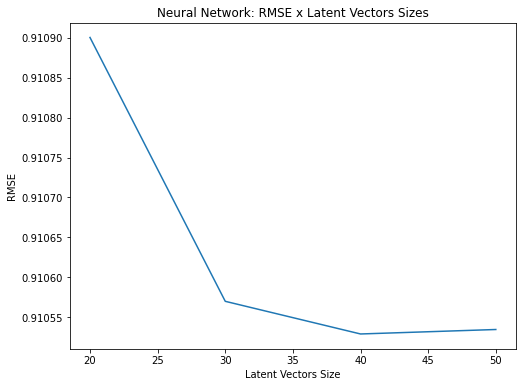

In [20]:
# Printing Line Diagram: RMSE values x Latent Vector Size
from operator import itemgetter
results = sorted(results, key=itemgetter(1), reverse=False)
latent_list = []
rmse_list = []
for i in range(len(results)):
    latent = results[i][1]
    rmse = results[i][4]
    latent_list.append(latent)
    rmse_list.append(rmse)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(latent_list,rmse_list)
plt.title('Neural Network: RMSE x Latent Vectors Sizes')
plt.xlabel('Latent Vectors Size')
plt.ylabel('RMSE')
plt.show()

## Choosing the model with lowest RMSE

In [21]:
# Selecting the model with lowest RMSE

results = sorted(results, key=itemgetter(4), reverse=False)
model = results[0][0]
latent_vectors = results[0][1]
y_test = results[0][2]
y_pred = results[0][3]
rmse_value = results[0][4]
mae_value = results[0][5]

In [22]:
# Printing metrics for the selected model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def get_metrics(y_test, y_pred, rmse_value, mae_value):

    print('Micro Precision of the selected model: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall of the selected model: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score of the selected model: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('\nRMSE loss of the selected model: ', round(rmse_value, 3))
    print('\nMAE loss of the selected model: ', round(mae_value, 3))
    
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']))

get_metrics(y_test, y_pred, rmse_value, mae_value)

Micro Precision of the selected model: 0.43
Micro Recall of the selected model: 0.43
Micro F1-score of the selected model: 0.43


RMSE loss of the selected model:  0.911

MAE loss of the selected model:  0.715

Classification Report

              precision    recall  f1-score   support

    Rating 1       0.78      0.08      0.15      5062
    Rating 2       0.30      0.16      0.21      9101
    Rating 3       0.40      0.54      0.46     21764
    Rating 4       0.44      0.65      0.52     27507
    Rating 5       0.65      0.18      0.28     16565

    accuracy                           0.43     79999
   macro avg       0.51      0.32      0.32     79999
weighted avg       0.48      0.43      0.40     79999



## Predicting rates: all users x all movies

In [23]:
from tqdm import tqdm as tq

df_list = []
movies_range = len(df_genres.movieId.values)
for i in tq(range(943)):
    user_id = i+1
    users_num = movies_range
    items_num = movies_range

    users_test = [user_id for i in range(users_num)]
    items_test = [i+1 for i in range(items_num)]
    test_feature_vec_list = [df_genres['feature_vec'][item-1] for item in items_test]
    y_hat = model(torch.LongTensor(users_test), torch.LongTensor(items_test), test_feature_vec_list)
    y_hat_array = torch.reshape(y_hat, (y_hat.shape[0],)).cpu().detach().numpy()
    y_hat_array = np.round(y_hat_array, 2)
    y_hat_array = np.where(y_hat_array>=6, 5, y_hat_array) 
    y_hat_array = np.where(y_hat_array==0, 1, y_hat_array)
    
    df_temp = pd.DataFrame({user_id: y_hat_array})
    df_list.append(df_temp)
df_mf = pd.concat(df_list, 1)
df_mf = df_mf.T
df_mf.columns = df_mf.columns.values+1
df_mf = df_mf.T.reset_index()
df_mf.rename(columns={'index':'movieId'}, inplace=True)
df_mf

100%|████████████████████████████████████████████████████████████████████████████████| 943/943 [00:22<00:00, 41.04it/s]


,movieId,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
0,1,3.89,3.91,2.79,2.16,3.40,3.62,2.15,4.07,4.33,...,2.15,4.34,4.19,3.47,2.16,4.93,3.51,4.20,2.16,3.80
1,2,3.36,3.38,2.26,1.62,2.87,3.08,1.62,3.53,3.79,...,1.62,3.81,3.65,2.94,1.62,4.39,2.98,3.66,1.62,3.26
2,3,3.10,3.12,2.00,1.36,2.61,2.83,1.36,3.28,3.54,...,1.36,3.55,3.40,2.68,1.37,4.14,2.72,3.41,1.37,3.00
3,4,3.63,3.65,2.53,1.89,3.14,3.36,1.89,3.81,4.07,...,1.89,4.08,3.93,3.21,1.90,4.67,3.25,3.94,1.90,3.53
4,5,3.34,3.36,2.24,1.60,2.85,3.06,1.60,3.51,3.77,...,1.60,3.79,3.63,2.92,1.60,4.37,2.96,3.64,1.60,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,3.08,3.11,1.98,1.35,2.59,2.81,1.34,3.26,3.52,...,1.34,3.54,3.38,2.67,1.35,4.12,2.70,3.39,1.35,2.99
1678,1679,3.23,3.26,2.13,1.50,2.74,2.96,1.49,3.41,3.67,...,1.49,3.69,3.53,2.82,1.50,4.27,2.85,3.54,1.50,3.14
1679,1680,3.46,3.48,2.36,1.72,2.97,3.18,1.72,3.63,3.89,...,1.72,3.91,3.75,3.04,1.72,4.49,3.08,3.76,1.72,3.36
1680,1681,3.29,3.31,2.19,1.55,2.80,3.01,1.55,3.46,3.72,...,1.55,3.74,3.59,2.87,1.55,4.32,2.91,3.59,1.55,3.19


## RMSE, MAE, Precision, Recall and F1-Score for the top-10 and top-20 recommendations 

### Top-20

In [24]:
# Importing required libraries
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings('ignore')


top_recommend = 20
rmse_list = []
mae_list = []
precision_list = []
recall_list = []
fscore_list = []

# Getting the top-20 recommendations for all users
# caluating the metrics and saving them in a data frame
for i in tq(range(1, 944)):
    user_id = i
    df_temp = df_mf.iloc[:,[0, user_id]].sort_values(by=user_id, ascending=False)
    items_list = df_temp.movieId.values[:top_recommend]
    items_pred_rat = df_temp[user_id][:top_recommend].values

    df_origin = data[data['userId']==user_id].sort_values(by='movieId')
    all_movies_watched = df_origin.movieId.values
    
    movies_match_list = []
    rating_model_list = []
    rating_real_list = []
    y_pred = []
    y_true = []
    
    for movie in items_list:
        if movie in all_movies_watched:
            
            y_pred.append(int(1))
            y_true.append(int(1))

            rating_model = df_temp[user_id][movie-1] 
            rating_model_list.append(rating_model)
            movies_match_list.append(movie)        
            rating_real = df_origin[df_origin['movieId']==movie]
            rating_real = rating_real['rating'].values[0]  
            rating_real_list.append(rating_real)
        else:
            y_pred.append(int(1))
            y_true.append(int(0))
    
    if rating_real_list:
        # if the user watched any video recommended, then calculate MSE and MAE
        rmse_value = mse(rating_real_list, rating_model_list, squared=False)
        mae_value = mae(rating_real_list, rating_model_list)
    else:
        # if the user did not watch any video recommended, set RMSE and MAE as null values
        rmse_value = np.NaN
        mae_value = np.NaN
    
    # Calculating metrics
    precision, recall, fscore, _ = score(y_true, y_pred)
    precision = precision[1]
    recall = recall[1]
    fscore = fscore[1]
    
    rmse_list.append(rmse_value)
    mae_list.append(mae_value)
    precision_list.append(precision)
    recall_list.append(recall)
    fscore_list.append(fscore)

df_eval = pd.DataFrame({'rmse':rmse_list, 'mae':mae_list, 'precision':precision_list,
                        'recall':recall_list, 'fscore':fscore_list})

100%|███████████████████████████████████████████████████████████████████████████████| 943/943 [00:07<00:00, 130.37it/s]


In [25]:
# Creating a dataframe that contains the metrics of the recommended movies for all users
df_eval

,rmse,mae,precision,recall,fscore
0,0.656308,0.592000,0.50,1.0,0.666667
1,0.562694,0.562500,0.20,1.0,0.333333
2,1.013040,0.945000,0.10,1.0,0.181818
3,1.899737,1.830000,0.10,1.0,0.181818
4,0.813585,0.740000,0.25,1.0,0.400000
...,...,...,...,...,...
938,0.450000,0.450000,0.05,1.0,0.095238
939,0.473193,0.262222,0.45,1.0,0.620690
940,0.010000,0.010000,0.05,1.0,0.095238
941,2.015171,1.877143,0.35,1.0,0.518519


In [27]:
# Printing metrics
print('RMSE mean: {}'.format(round(df_eval.rmse.mean(), 3)))
print('MAE mean: {}'.format(round(df_eval.mae.mean(), 3)))
print('Recall mean: {}'.format(round(df_eval.recall.mean(), 3)))
print('Precision mean: {}'.format(round(df_eval.precision.mean(), 3)))
print('F1 score mean: {}'.format(round(df_eval.fscore.mean(), 3)))

RMSE mean: 0.925
MAE mean: 0.834
Recall mean: 0.903
Precision mean: 0.259
F1 score mean: 0.367


### Top-10

In [28]:
# Importing required libraries
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings('ignore')


top_recommend = 10
rmse_list = []
mae_list = []
precision_list = []
recall_list = []
fscore_list = []

# Getting the top-20 recommendations for all users
# caluating the metrics and saving them in a data frame
for i in tq(range(1, 944)):
    user_id = i
    df_temp = df_mf.iloc[:,[0, user_id]].sort_values(by=user_id, ascending=False)
    items_list = df_temp.movieId.values[:top_recommend]
    items_pred_rat = df_temp[user_id][:top_recommend].values

    df_origin = data[data['userId']==user_id].sort_values(by='movieId')
    all_movies_watched = df_origin.movieId.values
    
    movies_match_list = []
    rating_model_list = []
    rating_real_list = []
    y_pred = []
    y_true = []
    
    for movie in items_list:
        if movie in all_movies_watched:
            
            y_pred.append(int(1))
            y_true.append(int(1))

            rating_model = df_temp[user_id][movie-1] 
            rating_model_list.append(rating_model)
            movies_match_list.append(movie)        
            rating_real = df_origin[df_origin['movieId']==movie]
            rating_real = rating_real['rating'].values[0]  
            rating_real_list.append(rating_real)
        else:
            y_pred.append(int(1))
            y_true.append(int(0))
    
    if rating_real_list:
        # if the user watched any video recommended, then calculate MSE and MAE
        rmse_value = mse(rating_real_list, rating_model_list, squared=False)
        mae_value = mae(rating_real_list, rating_model_list)
    else:
        # if the user did not watch any video recommended, set RMSE and MAE as null values
        rmse_value = np.NaN
        mae_value = np.NaN
    
    # Calculating metrics
    precision, recall, fscore, _ = score(y_true, y_pred)
    precision = precision[1]
    recall = recall[1]
    fscore = fscore[1]
    
    rmse_list.append(rmse_value)
    mae_list.append(mae_value)
    precision_list.append(precision)
    recall_list.append(recall)
    fscore_list.append(fscore)

df_eval = pd.DataFrame({'rmse':rmse_list, 'mae':mae_list, 'precision':precision_list,
                        'recall':recall_list, 'fscore':fscore_list})
# Printing metrics
print('RMSE mean: {}'.format(round(df_eval.rmse.mean(), 3)))
print('MAE mean: {}'.format(round(df_eval.mae.mean(), 3)))
print('Recall mean: {}'.format(round(df_eval.recall.mean(), 3)))
print('Precision mean: {}'.format(round(df_eval.precision.mean(), 3)))
print('F1 score mean: {}'.format(round(df_eval.fscore.mean(), 3)))

100%|███████████████████████████████████████████████████████████████████████████████| 943/943 [00:05<00:00, 182.77it/s]

RMSE mean: 0.879
MAE mean: 0.826
Recall mean: 0.755
Precision mean: 0.22
F1 score mean: 0.315
